In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("../data/cleaned/Cleaned_BMW_Sales_2010-2024.csv")

**We will have 3 graph types for our web dashboard:**
* Line Chart (Sales Volumn of each Model and Region over the years)
* Heatmap (Hot Model base on Sales Volumn over the years)
* Bar Chart (Show relationship between features and Price of Car)

### I. Line Chart

#### I.1. Sales Volumn of each Model over the years

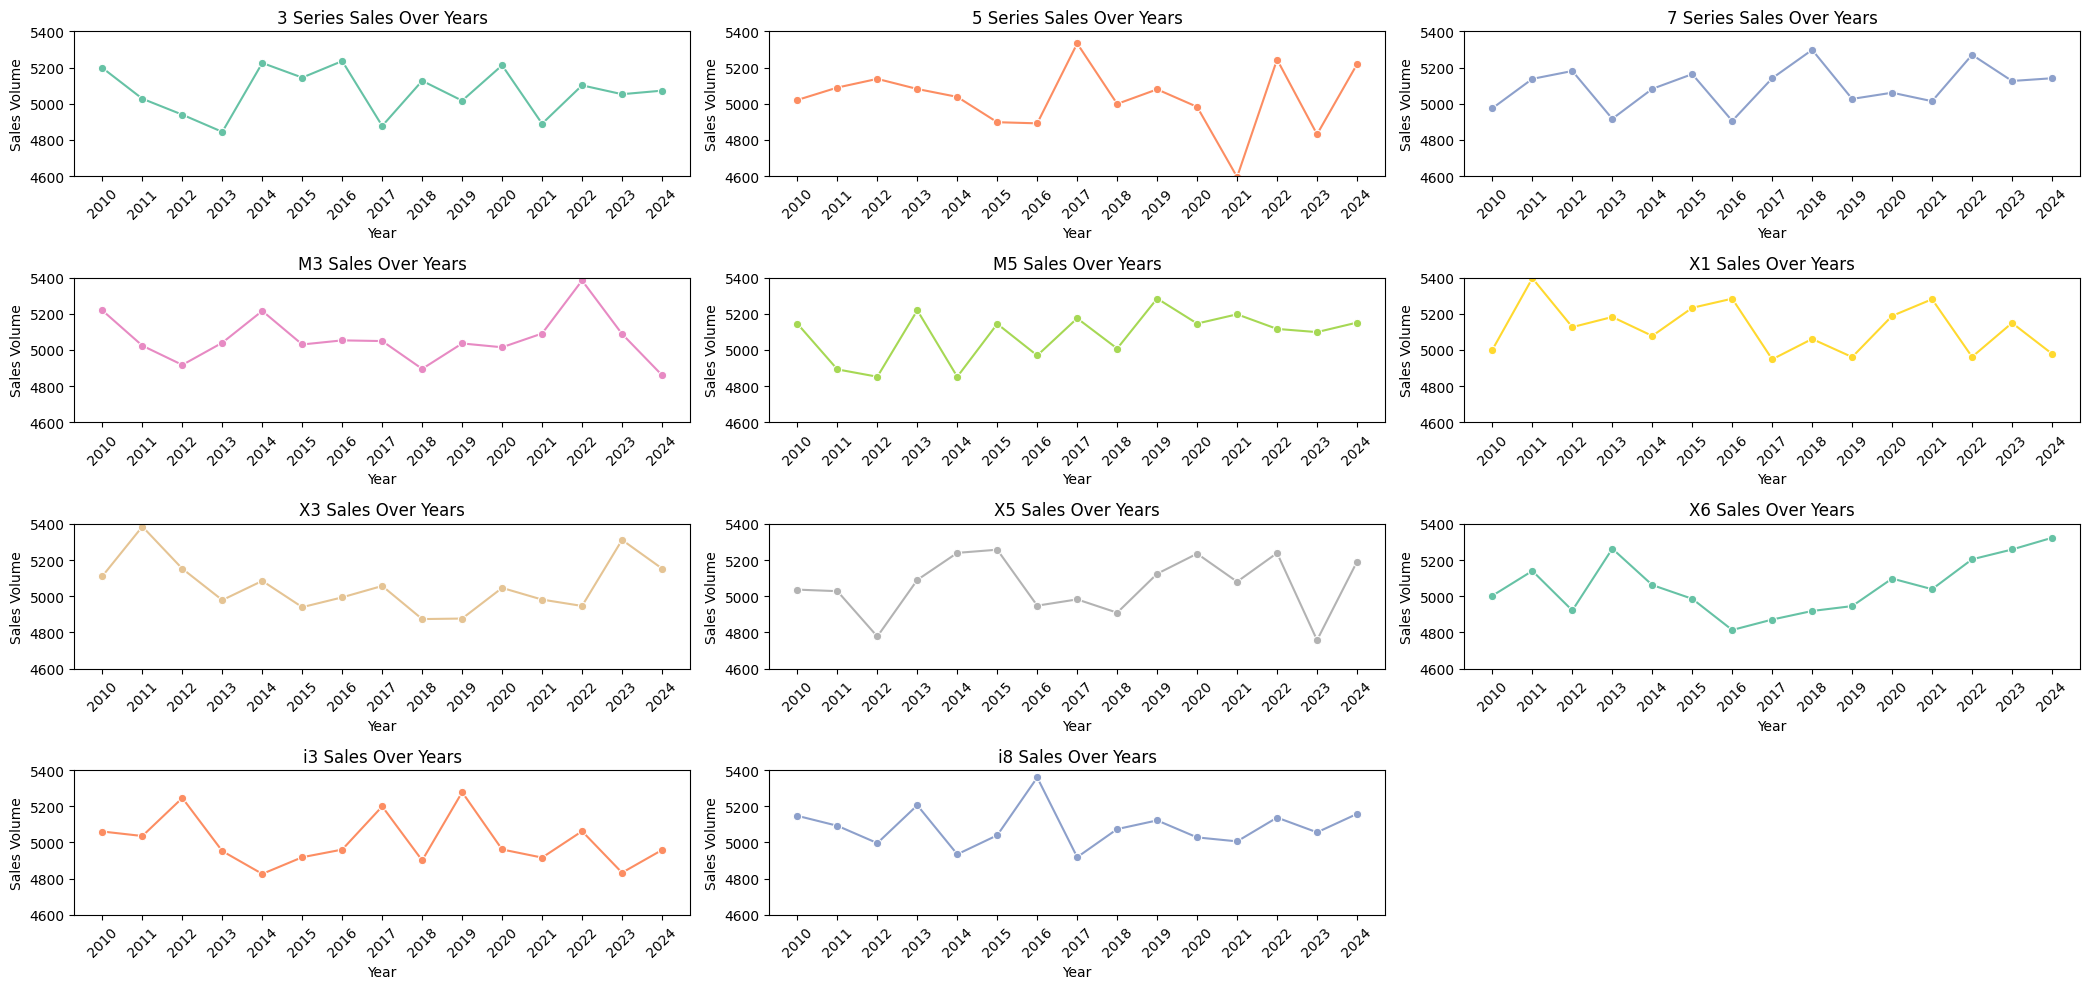

In [3]:
models = sorted(df['Model'].unique())
num_models = len(models)

fig, axs = plt.subplots(4, 3, figsize = (21,10))

axes = axs.flatten()

palette = sns.color_palette('Set2', n_colors=num_models)

for i, model in enumerate(models):
    ax = axes[i]
    model_data = df[df['Model'] == model]
    sns.lineplot(
        data=model_data,
        x='Year',
        y='Sales_Volume',
        ax=ax,
        color=palette[i],
        marker='o',
        errorbar=None
    )
    ax.set_title(f'{model} Sales Over Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sales Volume')
    ax.set_xticks(sorted(df['Year'].unique()))
    ax.tick_params(axis='x', rotation=45)
    
    ax.set_ylim(4600,5400)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [6]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [11]:
df_line_model = df.drop(columns = [col for col in df.columns if not (col == 'Model' or col == 'Year' or col == 'Sales_Volume')])
print(df_line_model)
df_line_model.to_csv('../data/line_graph/Model_Trend_BMW_Sales_2010-2024.csv', index=False)

          Model  Year  Sales_Volume
0      5 Series  2016          8300
1            i8  2013          3428
2      5 Series  2022          6994
3            X3  2024          4047
4      7 Series  2020          3080
...         ...   ...           ...
49995        i3  2014          8182
49996        i3  2023          9816
49997  5 Series  2010          8280
49998        i3  2020          9486
49999        X1  2020          1764

[50000 rows x 3 columns]


#### I.1. Sales Volumn of each Region over the years

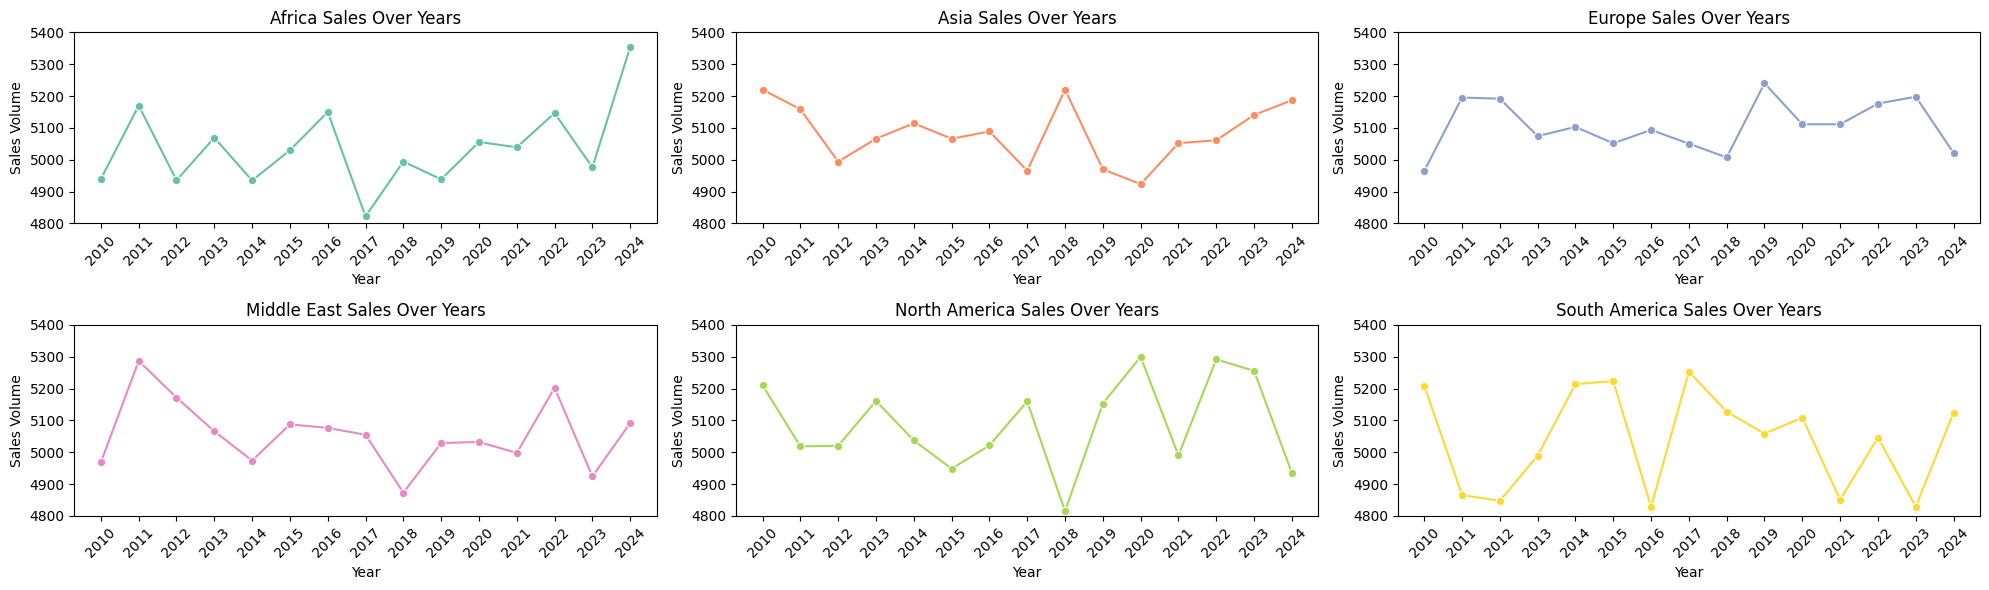

In [4]:
models = sorted(df['Region'].unique())
num_models = len(models)

fig, axs = plt.subplots(2, 3, figsize = (20,6))

axes = axs.flatten()

palette = sns.color_palette('Set2', n_colors=num_models)

for i, model in enumerate(models):
    ax = axes[i]
    model_data = df[df['Region'] == model]
    sns.lineplot(
        data=model_data,
        x='Year',
        y='Sales_Volume',
        ax=ax,
        color=palette[i],
        marker='o',
        errorbar=None
    )
    ax.set_title(f'{model} Sales Over Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sales Volume')
    ax.set_xticks(sorted(df['Year'].unique()))
    ax.tick_params(axis='x', rotation=45)
    
    ax.set_ylim(4800,5400)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
df_line_model = df.drop(columns = [col for col in df.columns if not (col == 'Region' or col == 'Year' or col == 'Sales_Volume')])
print(df_line_model)
df_line_model.to_csv('../data/line_graph/Region_Trend_BMW_Sales_2010-2024.csv', index=False)

       Year         Region  Sales_Volume
0      2016           Asia          8300
1      2013  North America          3428
2      2022  North America          6994
3      2024    Middle East          4047
4      2020  South America          3080
...     ...            ...           ...
49995  2014           Asia          8182
49996  2023    Middle East          9816
49997  2010    Middle East          8280
49998  2020           Asia          9486
49999  2020  North America          1764

[50000 rows x 3 columns]


### II. Heatmap

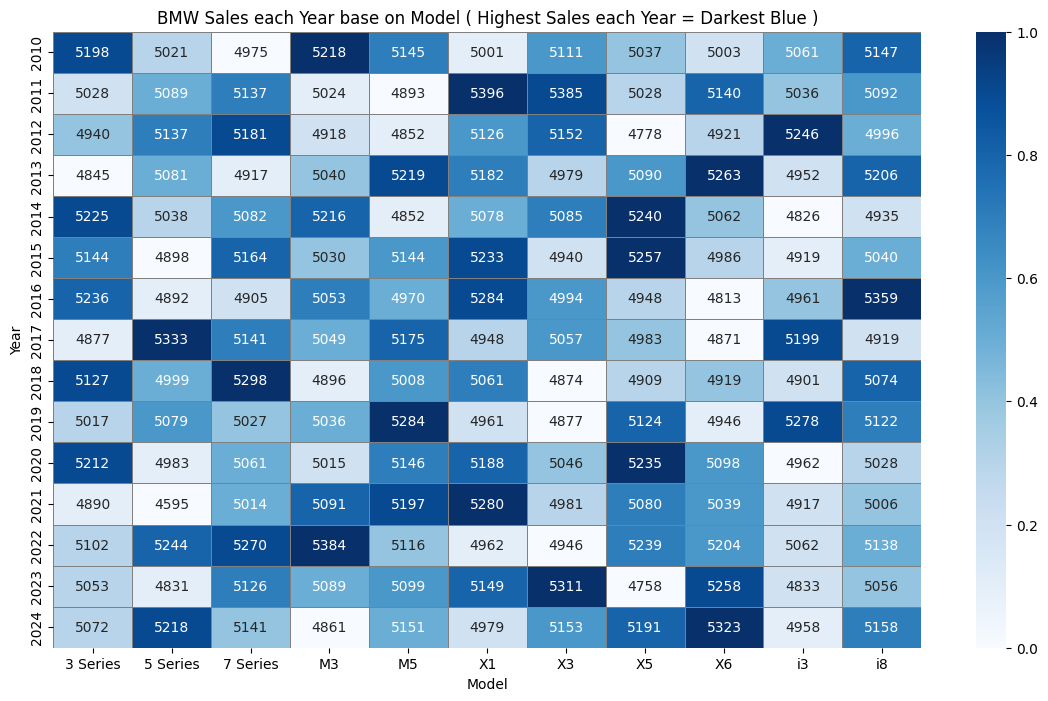

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = df.pivot_table(index='Year', columns='Model', values='Sales_Volume')

ranked = pivot_df.rank(axis=1, method='min', ascending=False)

normalized_rank = ranked.apply(lambda row: (row.max() - row) / (row.max() - row.min()), axis=1)

plt.figure(figsize=(14, 8))
sns.heatmap(
    normalized_rank,
    cmap='Blues',
    annot=pivot_df, fmt=".0f",
    linewidths=0.5, linecolor='gray'
)

plt.title("BMW Sales each Year base on Model ( Highest Sales each Year = Darkest Blue )")
plt.xlabel("Model")
plt.ylabel("Year")
plt.show()

### III. Bar Chart

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


#### III.1 Overview Correlation of all Features with Price

Price_USD                    1.000000
Region_Asia                  0.009028
Model_7 Series               0.006609
Model_3 Series               0.006505
Fuel_Type_Electric           0.005360
Transmission_Automatic       0.005230
Model_i8                     0.004064
Year                         0.003547
Model_5 Series               0.003098
Model_X1                     0.002777
Sales_Classification_Low     0.001727
Fuel_Type_Diesel             0.000991
Region_North America         0.000610
Engine_Size_L                0.000146
Sales_Volume                 0.000080
Model_X3                    -0.000217
Region_Europe               -0.000796
Fuel_Type_Petrol            -0.000984
Region_South America        -0.001043
Sales_Classification_High   -0.001727
Model_M3                    -0.002310
Region_Africa               -0.002545
Model_i3                    -0.002875
Model_X5                    -0.003943
Mileage_KM                  -0.004238
Transmission_Manual         -0.005230
Region_Middl

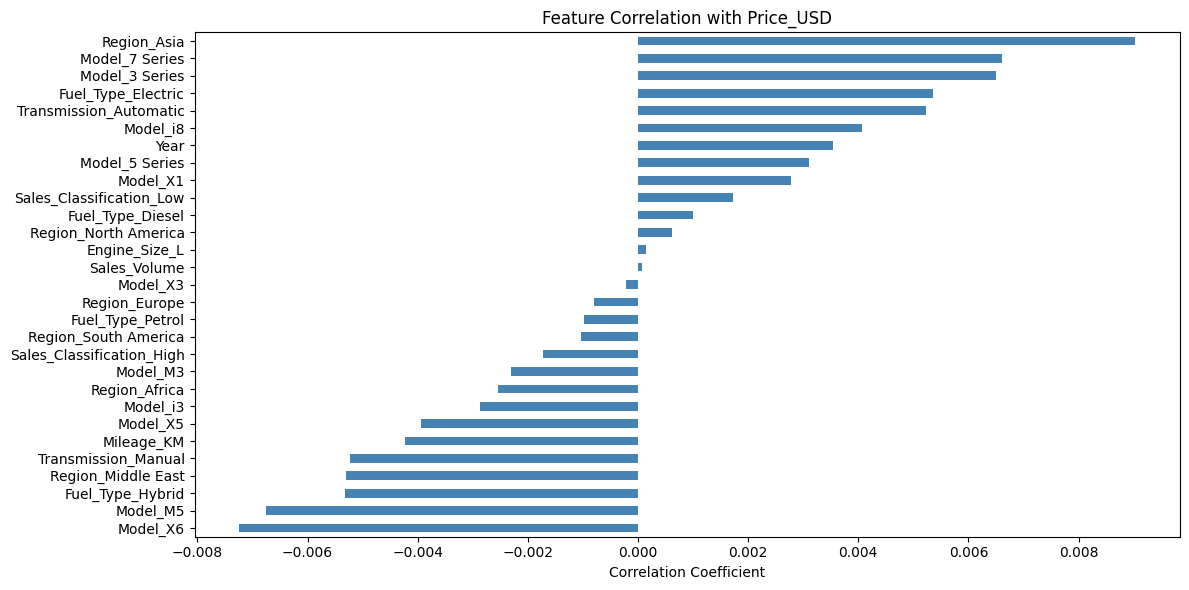

In [ ]:
df_encode = pd.read_csv("../data/encoded/Encoded_For_Visualize_BMW_Sales_2010-2024.csv")
df_encode = df_encode.drop(columns=[col for col in df_encode.columns if col.startswith("Color")])

corr_with_price = df_encode.corr()['Price_USD'].sort_values(ascending=False)
print(corr_with_price)

corr = corr_with_price.drop('Price_USD').sort_values()

# Plot
plt.figure(figsize=(12, 6))
corr.plot(kind='barh', color='steelblue')
plt.title("Feature Correlation with Price_USD")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()


#### III.2 Correlation between all Models and Price

Price_USD         1.000000
Model_7 Series    0.006609
Model_3 Series    0.006505
Model_i8          0.004064
Model_5 Series    0.003098
Model_X1          0.002777
Model_X3         -0.000217
Model_M3         -0.002310
Model_i3         -0.002875
Model_X5         -0.003943
Model_M5         -0.006752
Model_X6         -0.007238
Name: Price_USD, dtype: float64


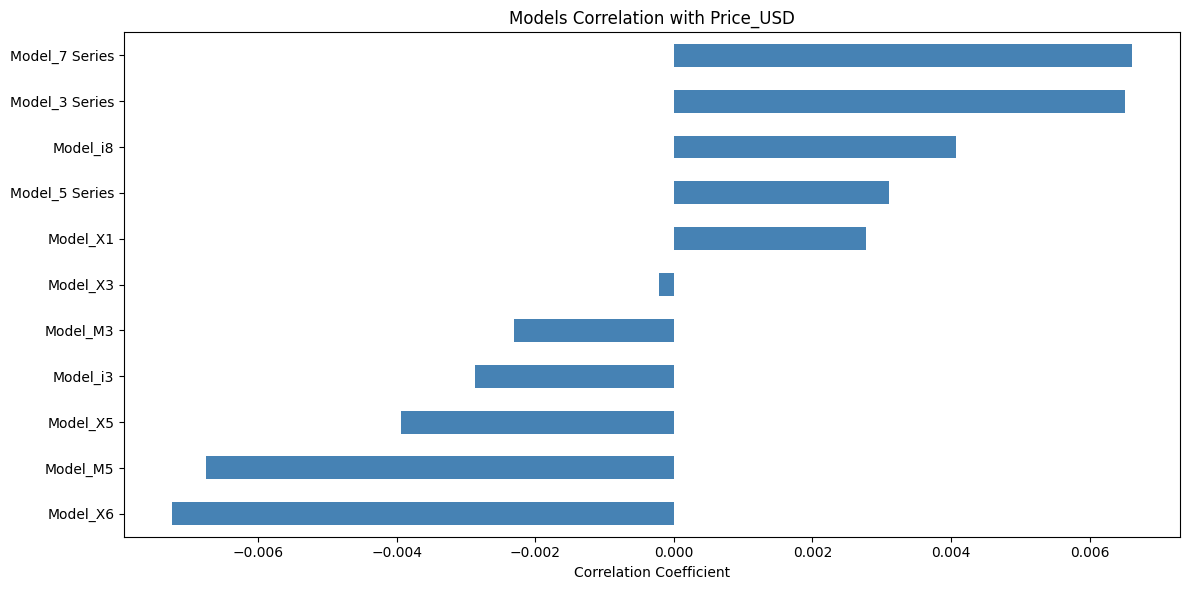

In [8]:
df_encode = pd.read_csv("../data/encoded/Encoded_For_Visualize_BMW_Sales_2010-2024.csv")
df_encode = df_encode.drop(columns=[col for col in df_encode.columns if (not col.startswith("Model")) and col != "Price_USD"])

corr_with_price = df_encode.corr()['Price_USD'].sort_values(ascending=False)
print(corr_with_price)

corr = corr_with_price.drop('Price_USD').sort_values()

# Plot
plt.figure(figsize=(12, 6))
corr.plot(kind='barh', color='steelblue')
plt.title("Models Correlation with Price_USD")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

#### III.3 Correlation between all Regions and Price

Price_USD               1.000000
Region_Asia             0.009028
Region_North America    0.000610
Region_Europe          -0.000796
Region_South America   -0.001043
Region_Africa          -0.002545
Region_Middle East     -0.005310
Name: Price_USD, dtype: float64


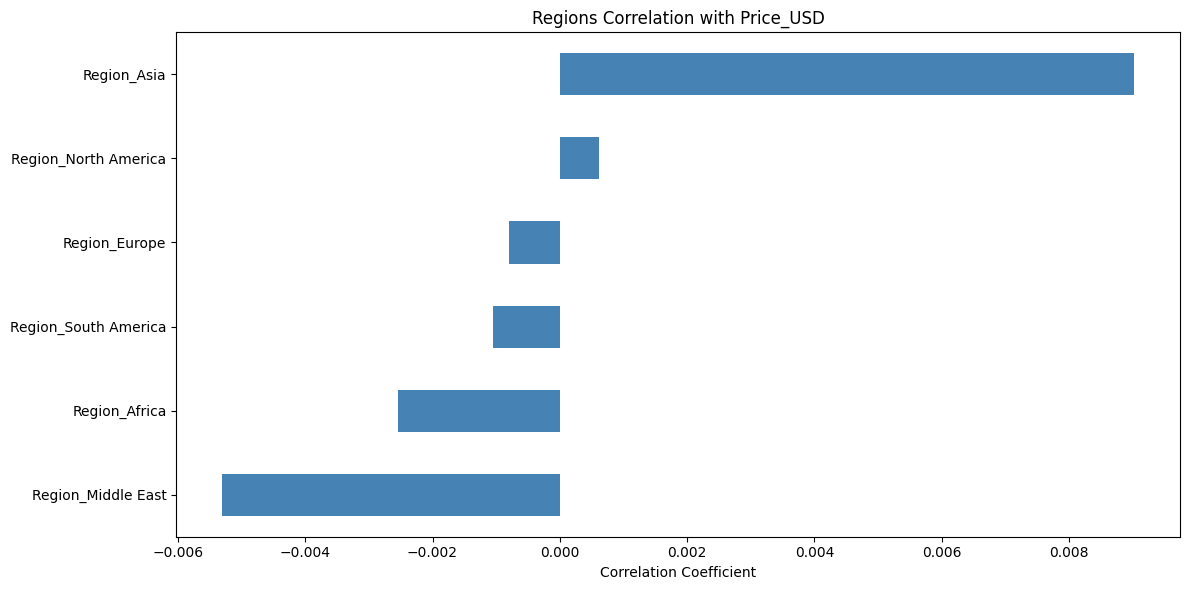

In [9]:
df_encode = pd.read_csv("../data/encoded/Encoded_For_Visualize_BMW_Sales_2010-2024.csv")
df_encode = df_encode.drop(columns=[col for col in df_encode.columns if (not col.startswith("Region")) and col != "Price_USD"])

corr_with_price = df_encode.corr()['Price_USD'].sort_values(ascending=False)
print(corr_with_price)

corr = corr_with_price.drop('Price_USD').sort_values()

# Plot
plt.figure(figsize=(12, 6))
corr.plot(kind='barh', color='steelblue')
plt.title("Regions Correlation with Price_USD")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

#### III.4 Correlation between all Colors and Price

Price_USD       1.000000
Color_Blue      0.006720
Color_White     0.006454
Color_Black    -0.000851
Color_Red      -0.002399
Color_Silver   -0.002420
Color_Grey     -0.007452
Name: Price_USD, dtype: float64


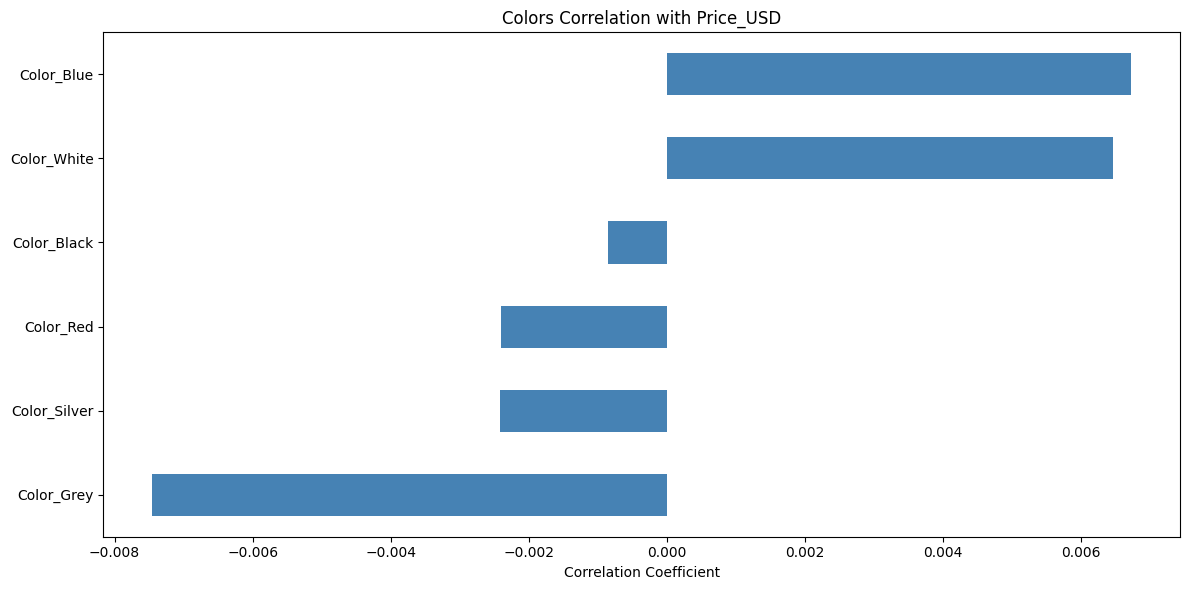

In [27]:
df_encode = pd.read_csv("../data/encoded/Encoded_For_Visualize_BMW_Sales_2010-2024.csv")
df_encode = df_encode.drop(columns=[col for col in df_encode.columns if (not col.startswith("Color")) and col != "Price_USD"])

corr_with_price = df_encode.corr()['Price_USD'].sort_values(ascending=False)
print(corr_with_price)

corr = corr_with_price.drop('Price_USD').sort_values()

# Plot
plt.figure(figsize=(12, 6))
corr.plot(kind='barh', color='steelblue')
plt.title("Colors Correlation with Price_USD")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

#### III.5 Correlation between all Fuel Types and Price

Price_USD             1.000000
Fuel_Type_Electric    0.005360
Fuel_Type_Diesel      0.000991
Fuel_Type_Petrol     -0.000984
Fuel_Type_Hybrid     -0.005325
Name: Price_USD, dtype: float64


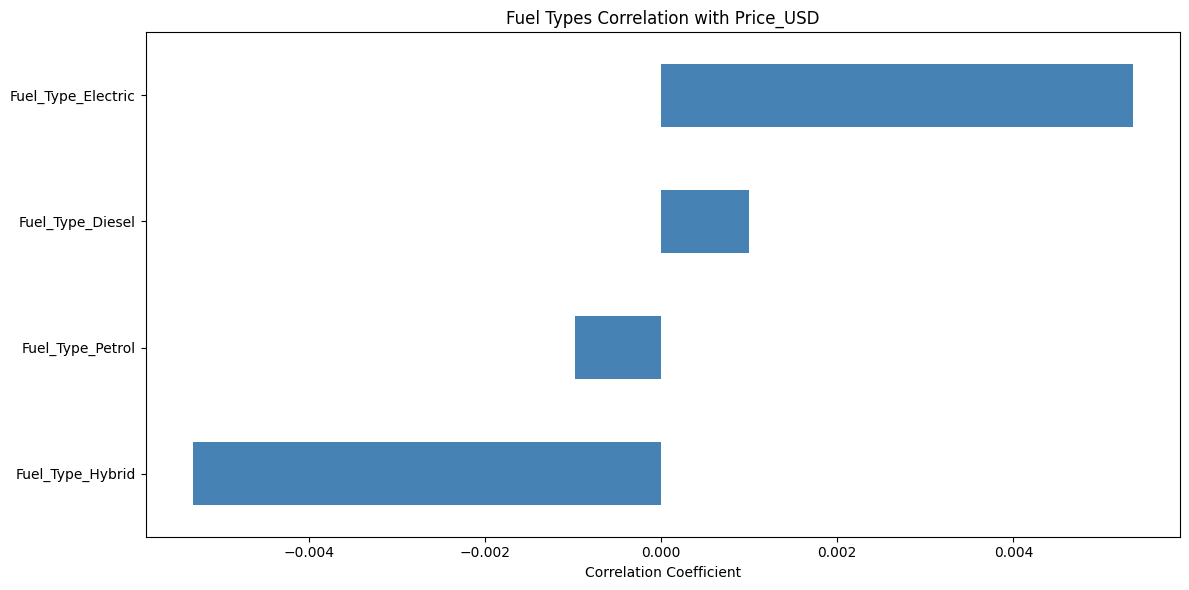

In [28]:
df_encode = pd.read_csv("../data/encoded/Encoded_For_Visualize_BMW_Sales_2010-2024.csv")
df_encode = df_encode.drop(columns=[col for col in df_encode.columns if (not col.startswith("Fuel_Type")) and col != "Price_USD"])

corr_with_price = df_encode.corr()['Price_USD'].sort_values(ascending=False)
print(corr_with_price)

corr = corr_with_price.drop('Price_USD').sort_values()

# Plot
plt.figure(figsize=(12, 6))
corr.plot(kind='barh', color='steelblue')
plt.title("Fuel Types Correlation with Price_USD")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

#### III.6 Correlation between all Transmissions and Price

Price_USD                 1.00000
Transmission_Automatic    0.00523
Transmission_Manual      -0.00523
Name: Price_USD, dtype: float64


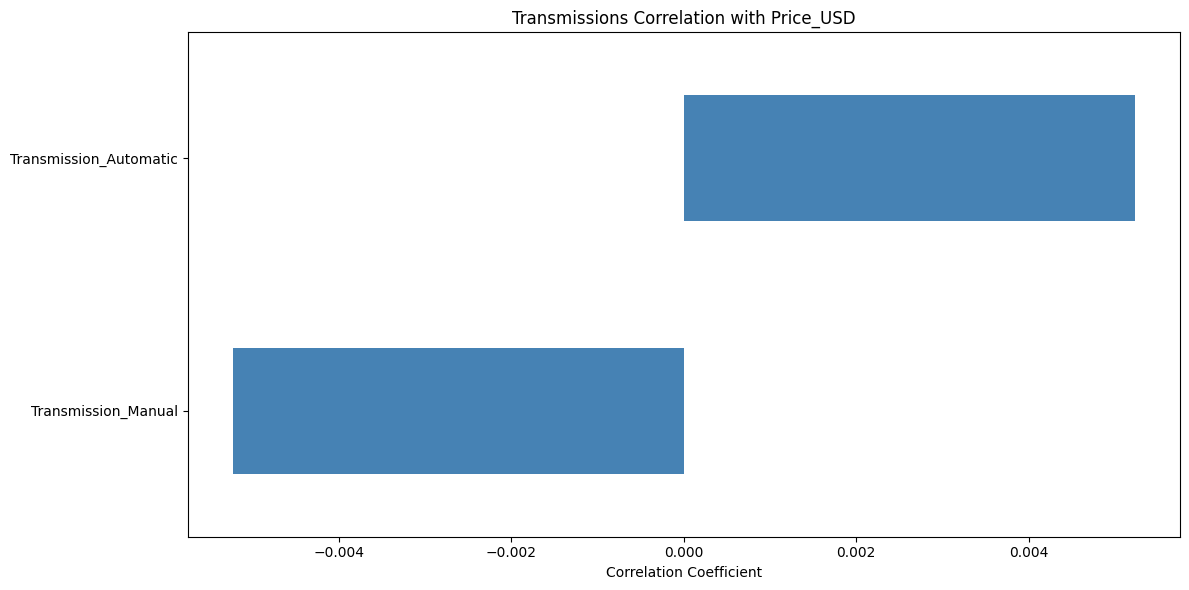

In [12]:
df_encode = pd.read_csv("../data/encoded/Encoded_For_Visualize_BMW_Sales_2010-2024.csv")
df_encode = df_encode.drop(columns=[col for col in df_encode.columns if (not col.startswith("Transmission")) and col != "Price_USD"])

corr_with_price = df_encode.corr()['Price_USD'].sort_values(ascending=False)
print(corr_with_price)

corr = corr_with_price.drop('Price_USD').sort_values()

# Plot
plt.figure(figsize=(12, 6))
corr.plot(kind='barh', color='steelblue')
plt.title("Transmissions Correlation with Price_USD")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

#### III.7 Correlation between all Sales Classification and Price

Price_USD                    1.000000
Sales_Classification_Low     0.001727
Sales_Classification_High   -0.001727
Name: Price_USD, dtype: float64


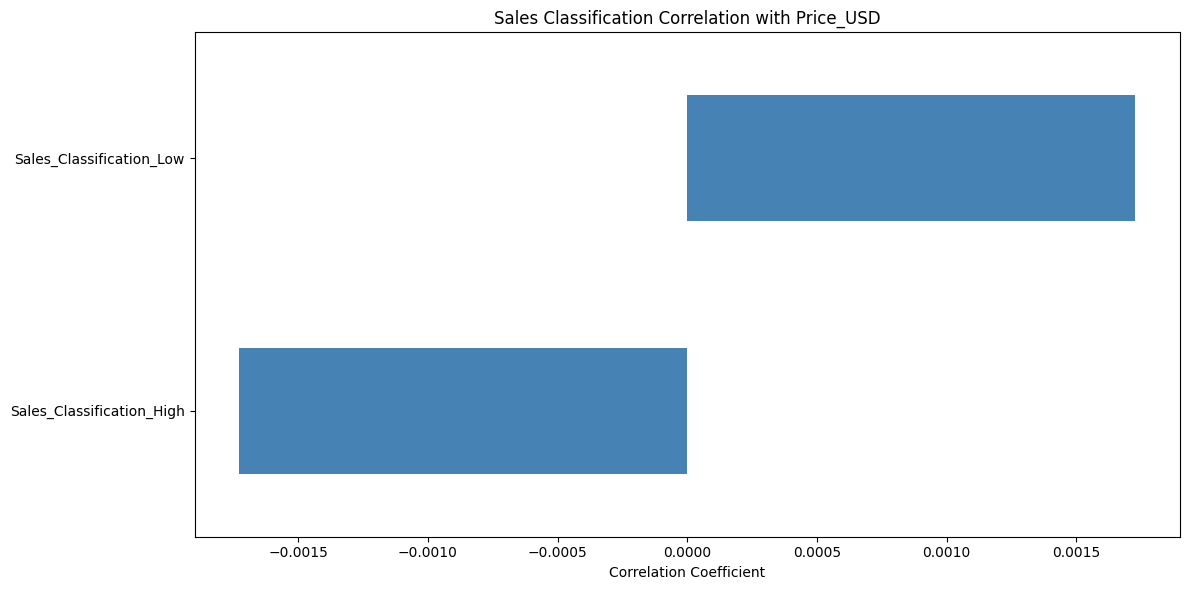

In [26]:
df_encode = pd.read_csv("../data/encoded/Encoded_For_Visualize_BMW_Sales_2010-2024.csv")
df_encode = df_encode.drop(columns=[col for col in df_encode.columns if (not col.startswith("Sales_Classification")) and col != "Price_USD"])

corr_with_price = df_encode.corr()['Price_USD'].sort_values(ascending=False)
print(corr_with_price)

corr = corr_with_price.drop('Price_USD').sort_values()

# Plot
plt.figure(figsize=(12, 6))
corr.plot(kind='barh', color='steelblue')
plt.title("Sales Classification Correlation with Price_USD")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

#### III.8 Correlation between Other (Year, Engine Size, Sales Volume, Mileage) and Price

Price_USD        1.000000
Engine_Size_L    0.000146
Sales_Volume     0.000080
Mileage_KM      -0.004238
Name: Price_USD, dtype: float64


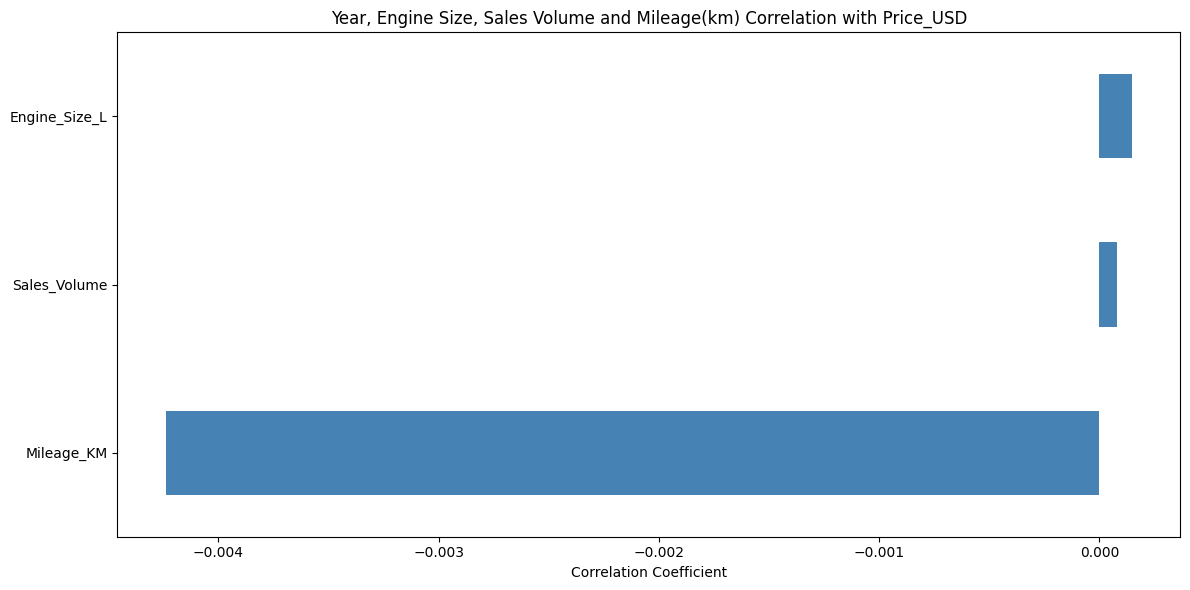

In [ ]:
df_encode = pd.read_csv("../data/encoded/Encoded_For_Visualize_BMW_Sales_2010-2024.csv")
df_encode = df_encode.drop(columns=[col for col in df_encode.columns if (not (col == "Year" or col =="Engine_Size_L" or col == "Mileage_KM" or col == "Sales_Volume")) and col != "Price_USD"])

corr_with_price = df_encode.corr()['Price_USD'].sort_values(ascending=False)
print(corr_with_price)

corr = corr_with_price.drop('Price_USD').sort_values()

# Plot
plt.figure(figsize=(12, 6))
corr.plot(kind='barh', color='steelblue')
plt.title("Year, Engine Size, Sales Volume and Mileage(km) Correlation with Price_USD")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()